# Step 3: Feature engineering & Model

---

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Đọc dữ liệu đã tiền xử lý từ file

In [14]:
data = pd.read_csv('weatherHaNoi_preprocessed.csv', sep='\t')
data.head(10)

,Date,Time,Weather,Temp,Feels,Gust,Rain,Humidity,Cloud,Pressure,Vis,Wind Speed,Wind Direction
0,"Thu 01, Jan 2009",00:00,Mist,23.0,25.0,15.0,0.0,0.97,1.00,1010.0,Poor,9.0,NNW
1,"Thu 01, Jan 2009",03:00,Rain,22.0,25.0,13.0,0.4,0.97,0.84,1010.0,Poor,9.0,NNW
2,"Thu 01, Jan 2009",06:00,Mist,22.0,25.0,8.0,0.0,0.98,1.00,1011.0,Poor,6.0,N
3,"Thu 01, Jan 2009",09:00,Cloudy,27.0,31.0,7.0,0.1,0.83,0.64,1011.0,Excellent,6.0,NNE
4,"Thu 01, Jan 2009",12:00,Cloudy,28.0,34.0,3.0,0.0,0.76,0.62,1010.0,Excellent,3.0,NE
5,"Thu 01, Jan 2009",15:00,Rain,27.0,32.0,4.0,3.1,0.83,0.74,1009.0,Good,2.0,NNE
6,"Thu 01, Jan 2009",18:00,Cloudy,24.0,27.0,14.0,0.0,0.91,0.73,1010.0,Excellent,7.0,NW
7,"Thu 01, Jan 2009",21:00,Rain,23.0,26.0,18.0,1.6,0.91,0.32,1012.0,Excellent,10.0,NNE
8,"Fri 02, Jan 2009",00:00,Cloudy,22.0,22.0,14.0,0.0,0.91,0.30,1011.0,Excellent,8.0,N
9,"Fri 02, Jan 2009",03:00,Cloudy,21.0,22.0,16.0,0.0,0.91,0.72,1010.0,Excellent,9.0,N


### Feature Engineering

Dùng thuộc tính của 3 khoảng thời gian trước để dự đoán giá trị Temperature ở thời điểm tiếp theo

In [15]:

def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]#Lấy số lượng hàng trong DataFrame 
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]#Tạo một danh sách mới. Nếu không có dữ liệu cho `N` ngày đầu tiên, giá trị sẽ là `None`. Sau `N` ngày đầu tiên, giá trị sẽ là giá trị của `feature` từ `N` ngày trước  
    col_name = "{}_{}".format(feature, N)# Tạo tên cho cột mới bằng cách nối tên của `feature` và `N`.
    df[col_name] = nth_prior_measurements#Thêm cột mới với tên `col_name` vào DataFrame với giá trị từ danh sách `nth_prior_measurements`.
    
for feature in data.columns:
    if feature != 'Time' and feature != 'Date':
        for N in range(1, 4):
            derive_nth_day_feature(data, feature, N)
            
data.drop(columns=['Date', 'Weather', 'Feels', 'Gust', 'Rain', 'Humidity', 'Cloud', 'Pressure', 'Wind Speed', 'Wind Direction', 'Vis'], inplace=True)
data = data[3:]#Xóa dữ liệu của 3 ngày đầu tiên 
data.reset_index(drop=True, inplace=True)#Đặt lại chỉ mục của DataFrame
            
data.head()

,Time,Temp,Weather_1,Weather_2,Weather_3,Temp_1,Temp_2,Temp_3,Feels_1,Feels_2,...,Pressure_3,Vis_1,Vis_2,Vis_3,Wind Speed_1,Wind Speed_2,Wind Speed_3,Wind Direction_1,Wind Direction_2,Wind Direction_3
0,09:00,27.0,Mist,Rain,Mist,22.0,22.0,23.0,25.0,25.0,...,1010.0,Poor,Poor,Poor,6.0,9.0,9.0,N,NNW,NNW
1,12:00,28.0,Cloudy,Mist,Rain,27.0,22.0,22.0,31.0,25.0,...,1010.0,Excellent,Poor,Poor,6.0,6.0,9.0,NNE,N,NNW
2,15:00,27.0,Cloudy,Cloudy,Mist,28.0,27.0,22.0,34.0,31.0,...,1011.0,Excellent,Excellent,Poor,3.0,6.0,6.0,NE,NNE,N
3,18:00,24.0,Rain,Cloudy,Cloudy,27.0,28.0,27.0,32.0,34.0,...,1011.0,Good,Excellent,Excellent,2.0,3.0,6.0,NNE,NE,NNE
4,21:00,23.0,Cloudy,Rain,Cloudy,24.0,27.0,28.0,27.0,32.0,...,1010.0,Excellent,Good,Excellent,7.0,2.0,3.0,NW,NNE,NE


In [16]:

data['Time'] = pd.to_datetime(data['Time']).dt.hour
data.head()

D:\Users\ncmin\AppData\Local\Temp\ipykernel_13136\3236143876.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time']).dt.hour


,Time,Temp,Weather_1,Weather_2,Weather_3,Temp_1,Temp_2,Temp_3,Feels_1,Feels_2,...,Pressure_3,Vis_1,Vis_2,Vis_3,Wind Speed_1,Wind Speed_2,Wind Speed_3,Wind Direction_1,Wind Direction_2,Wind Direction_3
0,9,27.0,Mist,Rain,Mist,22.0,22.0,23.0,25.0,25.0,...,1010.0,Poor,Poor,Poor,6.0,9.0,9.0,N,NNW,NNW
1,12,28.0,Cloudy,Mist,Rain,27.0,22.0,22.0,31.0,25.0,...,1010.0,Excellent,Poor,Poor,6.0,6.0,9.0,NNE,N,NNW
2,15,27.0,Cloudy,Cloudy,Mist,28.0,27.0,22.0,34.0,31.0,...,1011.0,Excellent,Excellent,Poor,3.0,6.0,6.0,NE,NNE,N
3,18,24.0,Rain,Cloudy,Cloudy,27.0,28.0,27.0,32.0,34.0,...,1011.0,Good,Excellent,Excellent,2.0,3.0,6.0,NNE,NE,NNE
4,21,23.0,Cloudy,Rain,Cloudy,24.0,27.0,28.0,27.0,32.0,...,1010.0,Excellent,Good,Excellent,7.0,2.0,3.0,NW,NNE,NE


In [17]:

corr = data[['Temp', 'Temp_1', 'Temp_2', 'Temp_3', 'Feels_1','Feels_2', 'Feels_3','Wind Speed_1','Wind Speed_2', 'Wind Speed_3', 'Gust_1', 'Gust_2','Gust_3','Rain_1','Rain_2', 'Rain_3','Humidity_1','Humidity_2','Humidity_3','Cloud_1', 'Cloud_2', 'Cloud_3', 'Pressure_1','Pressure_2','Pressure_3' ]].corr()[['Temp']].sort_values('Temp')

corr

,Temp
Humidity_1,-0.593766
Temp_3,-0.201505
Gust_2,-0.200011
Feels_3,-0.185120
Gust_3,-0.161530
Humidity_2,-0.154154
Cloud_2,-0.142889
Gust_1,-0.123309
Cloud_1,-0.121738
Rain_3,-0.119025


**Tính độ tương quan giữa các thuộc tính số với Temp**

Bỏ các cột có |correlation| < 0.5

In [18]:
data.drop(columns=[col for col in corr.index if abs(corr['Temp'].loc[col]) < 0.5], inplace=True)

In [19]:
data.head()

,Time,Temp,Weather_1,Weather_2,Weather_3,Temp_1,Feels_1,Humidity_1,Vis_1,Vis_2,Vis_3,Wind Direction_1,Wind Direction_2,Wind Direction_3
0,9,27.0,Mist,Rain,Mist,22.0,25.0,0.98,Poor,Poor,Poor,N,NNW,NNW
1,12,28.0,Cloudy,Mist,Rain,27.0,31.0,0.83,Excellent,Poor,Poor,NNE,N,NNW
2,15,27.0,Cloudy,Cloudy,Mist,28.0,34.0,0.76,Excellent,Excellent,Poor,NE,NNE,N
3,18,24.0,Rain,Cloudy,Cloudy,27.0,32.0,0.83,Good,Excellent,Excellent,NNE,NE,NNE
4,21,23.0,Cloudy,Rain,Cloudy,24.0,27.0,0.91,Excellent,Good,Excellent,NW,NNE,NE


**Chọn thuộc tính categorical cho việc dự đoán**

In [20]:
data.drop(columns=['Wind Direction_1', 'Wind Direction_2', 'Wind Direction_3', 'Vis_1', 'Vis_2', 'Vis_3'], inplace=True)
data.head()

,Time,Temp,Weather_1,Weather_2,Weather_3,Temp_1,Feels_1,Humidity_1
0,9,27.0,Mist,Rain,Mist,22.0,25.0,0.98
1,12,28.0,Cloudy,Mist,Rain,27.0,31.0,0.83
2,15,27.0,Cloudy,Cloudy,Mist,28.0,34.0,0.76
3,18,24.0,Rain,Cloudy,Cloudy,27.0,32.0,0.83
4,21,23.0,Cloudy,Rain,Cloudy,24.0,27.0,0.91


**Encoding categorical values**

In [21]:
# one-hot encoding
cols_object = [col for col in data.columns if data[col].dtype=='object']#tạo một danh sách chứa tên của tất cả các cột trong DataFrame data mà kiểu dữ liệu của chúng là ‘object’
for col in cols_object:
    dummies = pd.get_dummies(data[col], prefix=col)# tạo một DataFrame mới dummies chứa các cột đã được mã hóa từ cột hiện tại.
    data.drop(columns=[col], inplace=True)
    data = pd.concat([data, dummies], axis=1)#Dòng này nối dummies với data dọc theo trục cột (axis=1), thêm các cột đã được mã hóa vào data.
data.head()

,Time,Temp,Temp_1,Feels_1,Humidity_1,Weather_1_Clear,Weather_1_Cloudy,Weather_1_Mist,Weather_1_Overcast,Weather_1_Rain,...,Weather_2_Mist,Weather_2_Overcast,Weather_2_Rain,Weather_2_Sunny,Weather_3_Clear,Weather_3_Cloudy,Weather_3_Mist,Weather_3_Overcast,Weather_3_Rain,Weather_3_Sunny
0,9,27.0,22.0,25.0,0.98,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
1,12,28.0,27.0,31.0,0.83,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,15,27.0,28.0,34.0,0.76,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,18,24.0,27.0,32.0,0.83,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,21,23.0,24.0,27.0,0.91,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False


### Model

**Chuẩn bị dữ liệu**

In [22]:
X = data.drop(columns=['Temp'])
y = data['Temp']
scaler = MinMaxScaler()#MinMaxScaler được sử dụng để chuẩn hóa dữ liệu về phạm vi từ 0 đến 1.
X = scaler.fit_transform(X)#vừa tính toán các tham số cần thiết cho việc chuẩn hóa (min, max) vừa thực hiện việc chuyển đổi dữ liệu.
y = scaler.fit_transform(y.to_numpy().reshape((-1, 1)))# trước khi chuẩn hóa chuyển thành một mảng numpy và được reshape thành một mảng 2 chiều (vì MinMaxScaler yêu cầu dữ liệu đầu vào là mảng 2 chiều).

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
#test_size=0.2 nghĩa là 20% dữ liệu sẽ được sử dụng cho tập kiểm tra, còn lại 80% dành cho tập huấn luyện.
#shuffle=False nghĩa là dữ liệu sẽ không được xáo trộn trước khi chia

**Linear Regression**

In [24]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_pred)#phương sai bình phương trung bình
print(f'Độ lỗi trên tập train: {mse}')

Độ lỗi trên tập train: 0.006642963521576954


In [31]:
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Độ lỗi trên tập test: {mse}')

Độ lỗi trên tập test: 0.009826784342468713


**Dự đoán trên 100 dòng dữ liệu cuối**

In [27]:
y_pred = reg.predict(X_test[-100:])
y_pred = scaler.inverse_transform(y_pred)#Chuyển lại dạng ban đầu

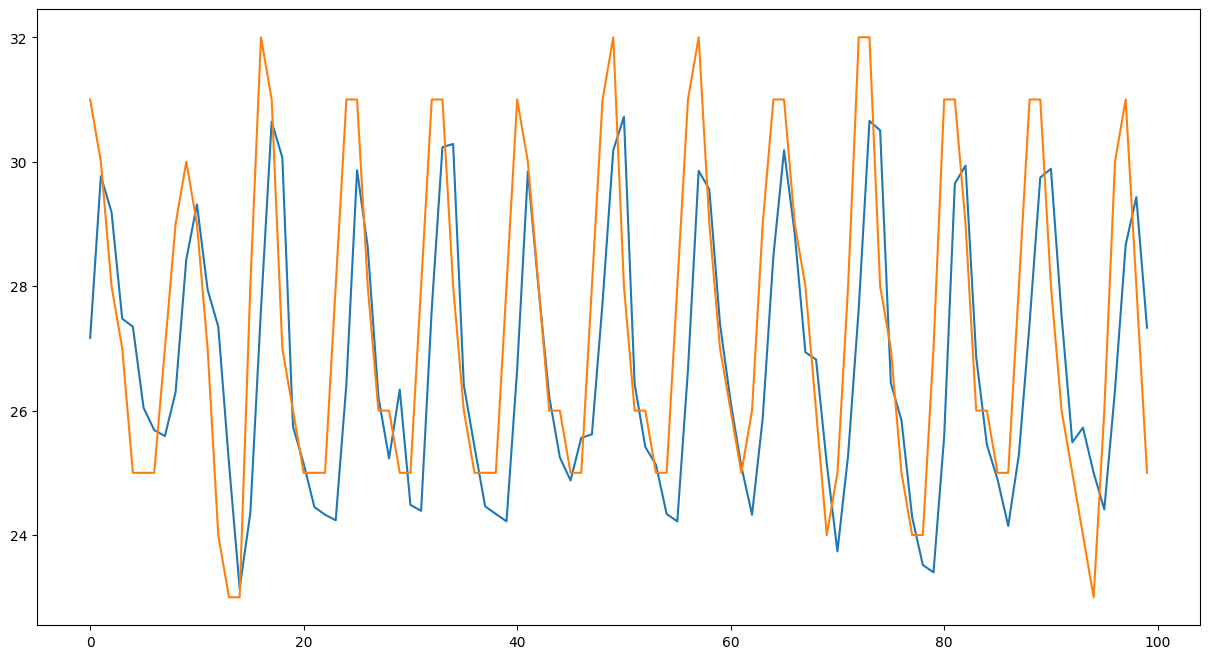

In [29]:
plt.figure(figsize=(15, 8))
plt.plot(y_pred)
plt.plot(data['Temp'][-100:].to_numpy())